In [1]:
## We will use diabetes dataset to understand regularization

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Load diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Initialize and fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R^2:", r2_ridge)

# Initialize and fit Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R^2:", r2_lasso)

# Initialize and fit Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic = elastic_net_model.predict(X_test)
r2_elastic_net = r2_score(y_test, y_pred_elastic)
print("Elastic Net Regression R^2:", r2_elastic_net)


Ridge Regression R^2: 0.41915292635986545
Lasso Regression R^2: 0.4718547867276227
Elastic Net Regression R^2: 0.09865421116113748


While Ridge and Lasso did a decent job, ElasticNet was bad.
Adjusting the alpha parameter and, for Elastic Net, the l1_ratio parameter, could lead to different performance outcomes, which might require some tuning via methods like cross-validation.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Load diabetes dataset
data = load_diabetes()
X = data.data
y = data.target


In [3]:
## Adding Cross Validation

def evaluate_model(Model, alphas, X, y):
    mean_scores = []
    for alpha in alphas:
        model = Model(alpha=alpha)
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        mean_scores.append(np.mean(scores))
    return mean_scores


In [5]:
alphas = np.logspace(-4, 1, 50)  # Range of alpha values

# Evaluate Ridge
ridge_scores = evaluate_model(Ridge, alphas, X, y)

# Evaluate Lasso
lasso_scores = evaluate_model(Lasso, alphas, X, y)

# Evaluate Elastic Net
elastic_net_scores = evaluate_model(ElasticNet, alphas, X, y)


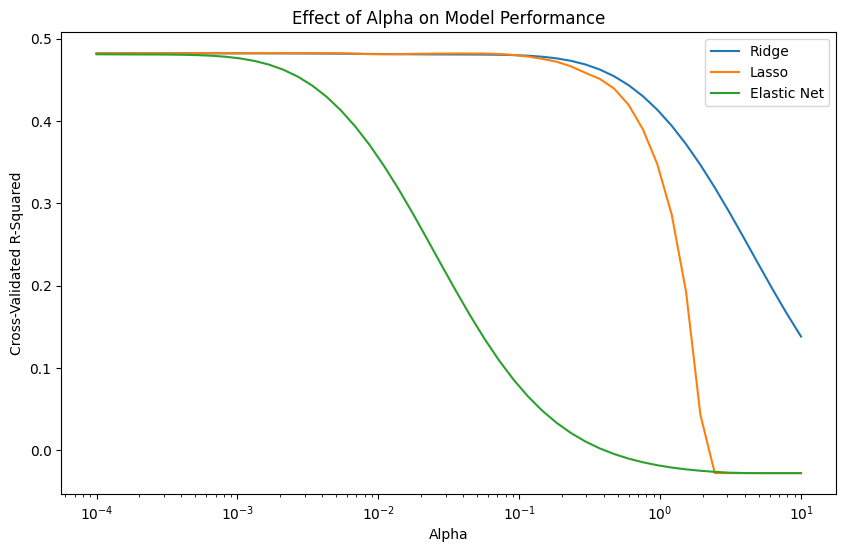

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label='Ridge')
plt.plot(alphas, lasso_scores, label='Lasso')
plt.plot(alphas, elastic_net_scores, label='Elastic Net')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R-Squared')
plt.title('Effect of Alpha on Model Performance')
plt.legend()
plt.show()
